In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer
import loads

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Falling Short - 2045

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                    100.224000
Small Hydro              220.570980
Biomass (dedicated)      270.572279
Natural Gas             1156.400000
Large Hydro             1615.931790
Solar Photovoltaics     2469.211982
CCS Gas                 3678.584435
Wind Onshore           21561.132793
Wind Offshore          25831.100000
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                       180.662069
Pumped Storage Hydroelectric    1400.000000
Battery                         1971.232950
Name: p_nom, dtype: float64


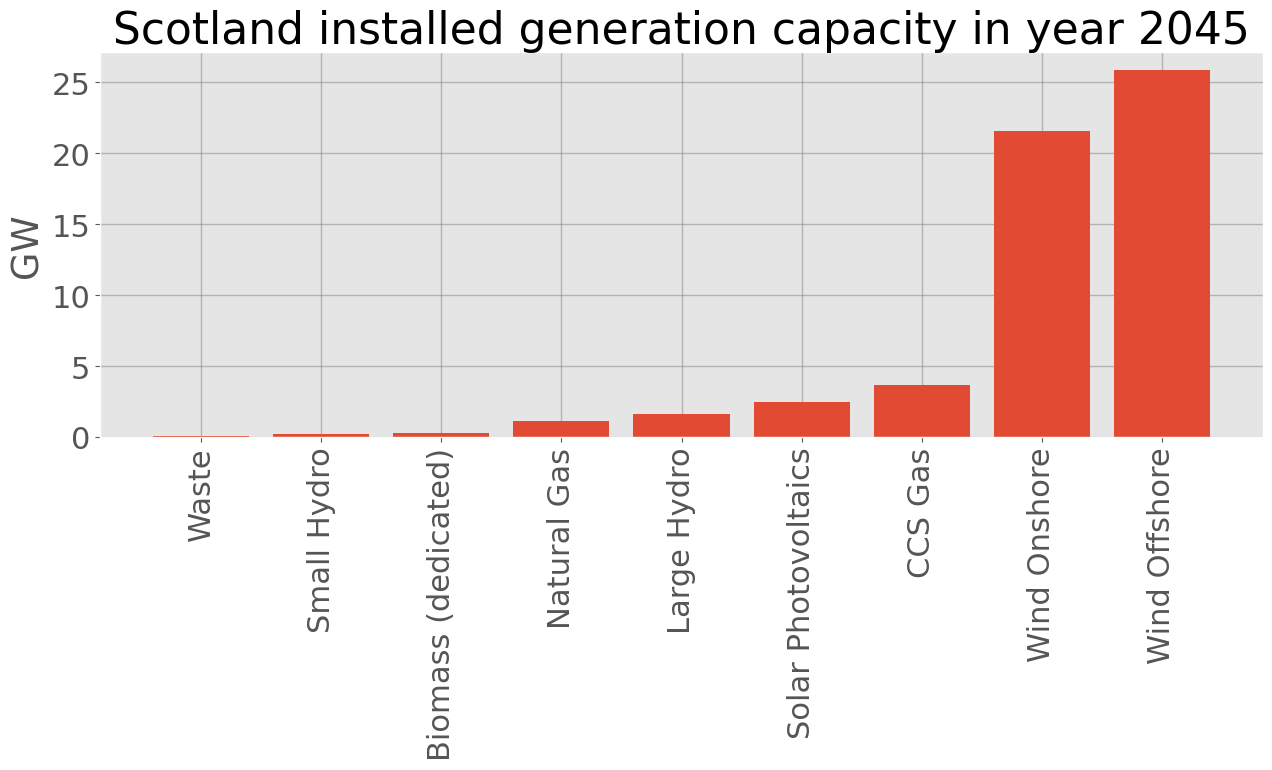

In [3]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
scenario = 'Falling Short'
year = 2045
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2045 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2045 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2045 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland_2045.index, generators_p_nom_scotland_2045.values / 1000)
plt.xticks(generators_p_nom_scotland_2045.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Falling Short - 2040

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                    106.720000
Small Hydro              220.129152
Biomass (dedicated)      270.572279
Natural Gas             1180.000000
Large Hydro             1612.694957
Solar Photovoltaics     1970.282102
CCS Gas                 2778.584435
Wind Onshore           21324.359126
Wind Offshore          22911.100000
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                       180.662069
Pumped Storage Hydroelectric    1400.000000
Battery                         1941.333064
Name: p_nom, dtype: float64


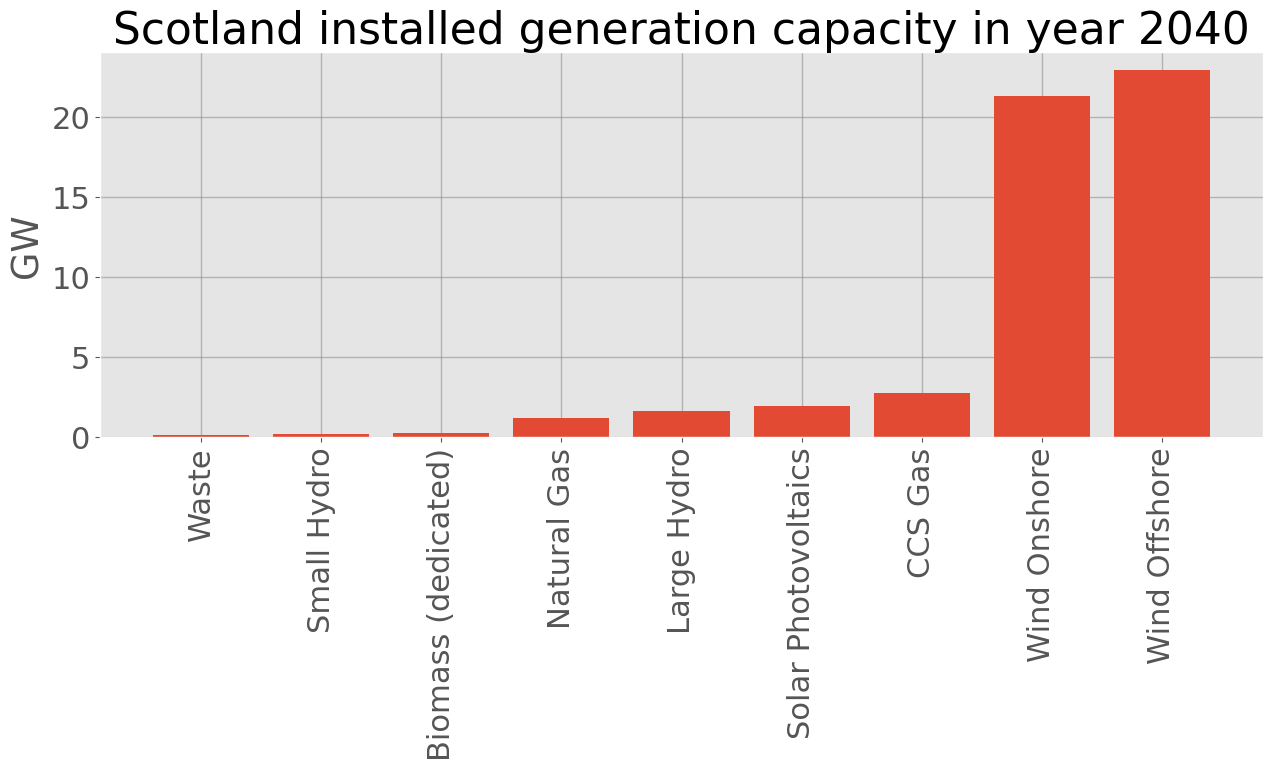

In [4]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
scenario = 'Falling Short'
year = 2040
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2040 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2040 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2040 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Falling Short - 2035

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                    108.112000
Small Hydro              219.634039
Biomass (dedicated)      270.572279
CCS Gas                  988.584435
Solar Photovoltaics     1583.852223
Large Hydro             1609.067676
Wind Offshore           9256.100000
Wind Onshore           19807.003536
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                        70.317241
Pumped Storage Hydroelectric     740.000000
Battery                         1886.333617
Name: p_nom, dtype: float64


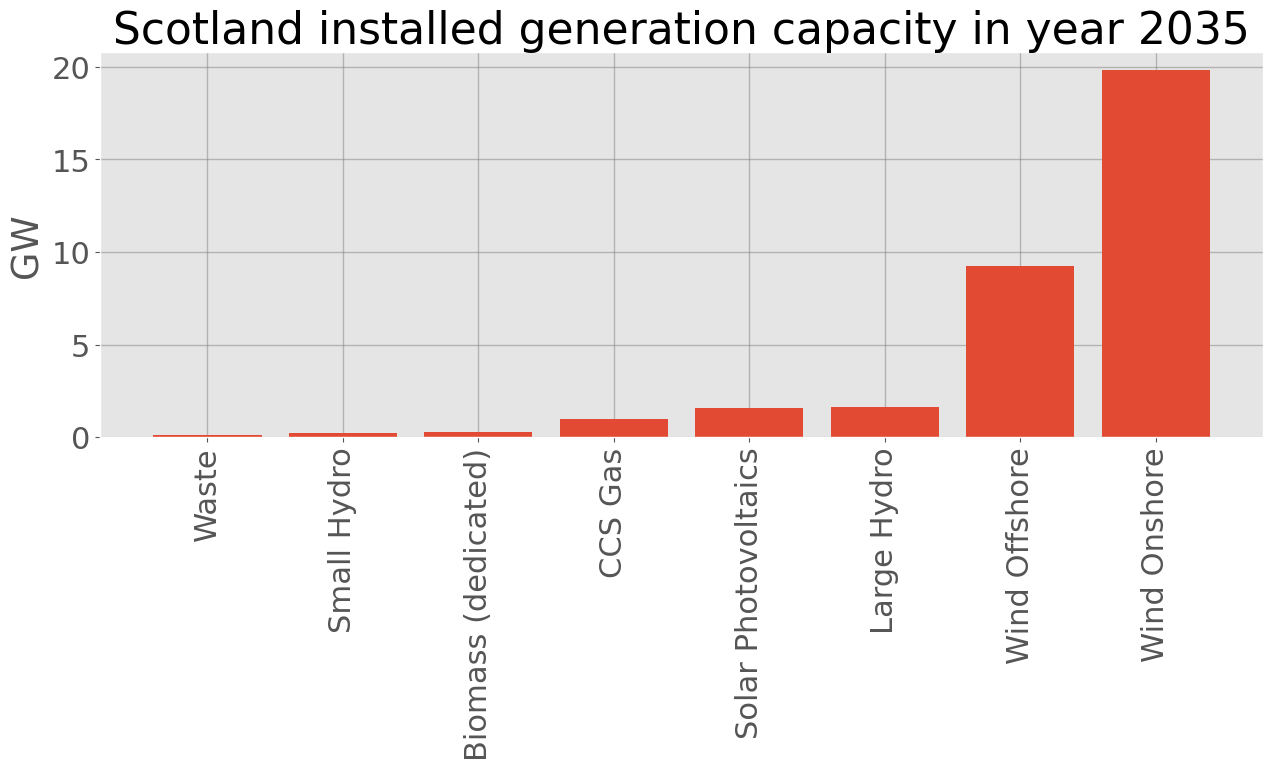

In [5]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
scenario = 'Falling Short'
year = 2035
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2035 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2035 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2035 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Falling Short - 2030

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Oil                       89.700000
Waste                    102.080000
Small Hydro              219.070901
Biomass (dedicated)      270.572279
Solar Photovoltaics     1006.186637
Large Hydro             1604.942054
Wind Offshore           5066.100000
Wind Onshore           16385.368947
Name: p_nom, dtype: float64
carrier
Compressed Air                     0.910345
Liquid Air                        15.144828
Pumped Storage Hydroelectric     740.000000
Battery                         1473.943124
Name: p_nom, dtype: float64


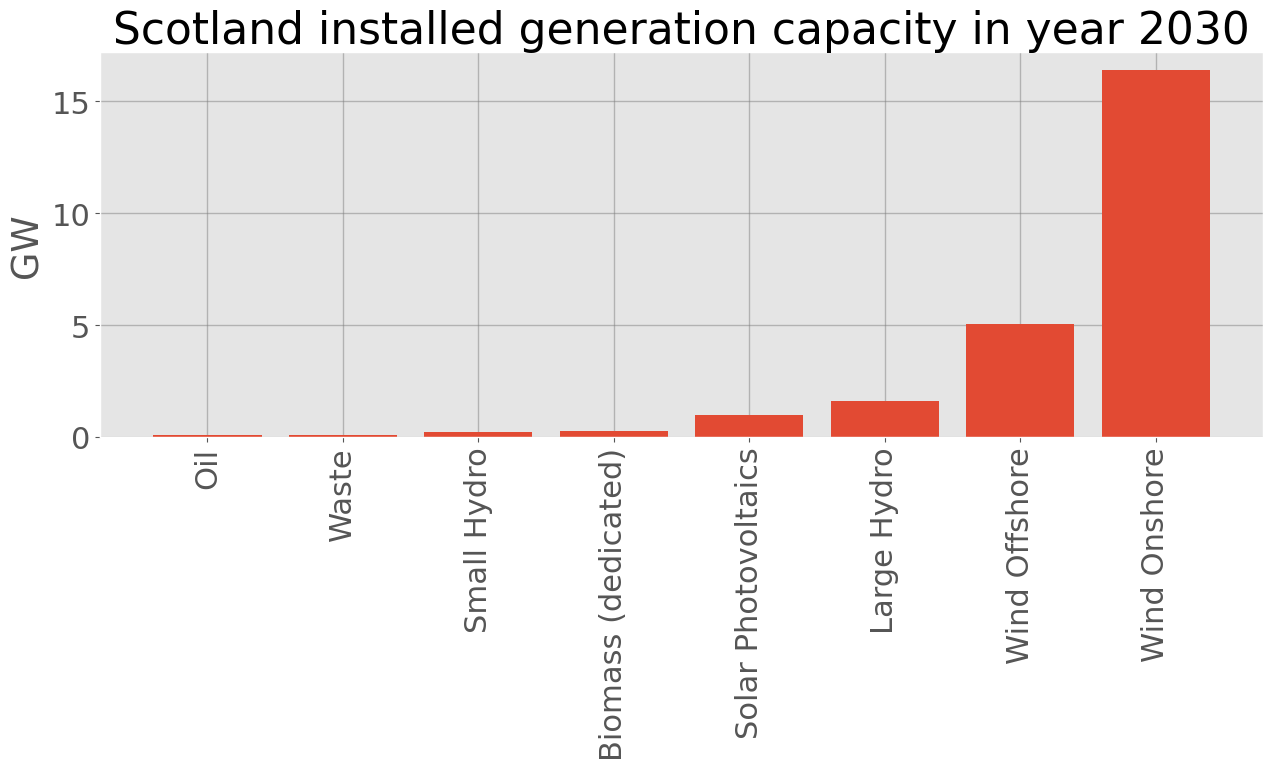

In [6]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
scenario = 'Falling Short'
year = 2030
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2030 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2030 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2030 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Falling Short - 2021

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


carrier
Waste                    57.536000
Oil                     197.340000
Biomass (dedicated)     207.606890
Small Hydro             217.124238
Solar Photovoltaics     462.292021
Natural Gas            1038.400000
Large Hydro            1590.680533
Wind Offshore          1663.100000
Nuclear                1750.000000
Wind Onshore           8928.648516
Name: p_nom, dtype: float64
carrier
Compressed Air                    0.910345
Liquid Air                        1.379310
Battery                         124.353150
Pumped Storage Hydroelectric    740.000000
Name: p_nom, dtype: float64
4619.714


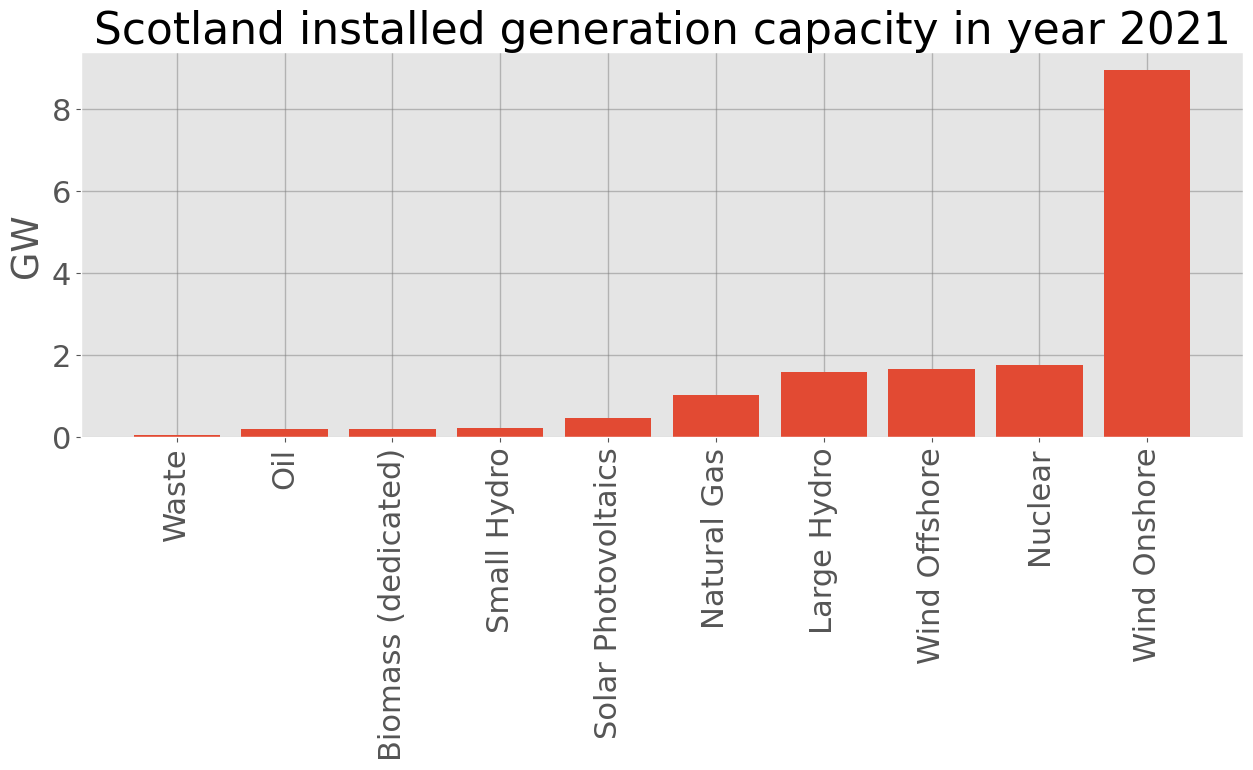

In [7]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
scenario = 'Falling Short'
year = 2021
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2021 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2021 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2021 = df_loads[buses_scotland].sum(axis=1).max()
print(peak_load_scotland_2021)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

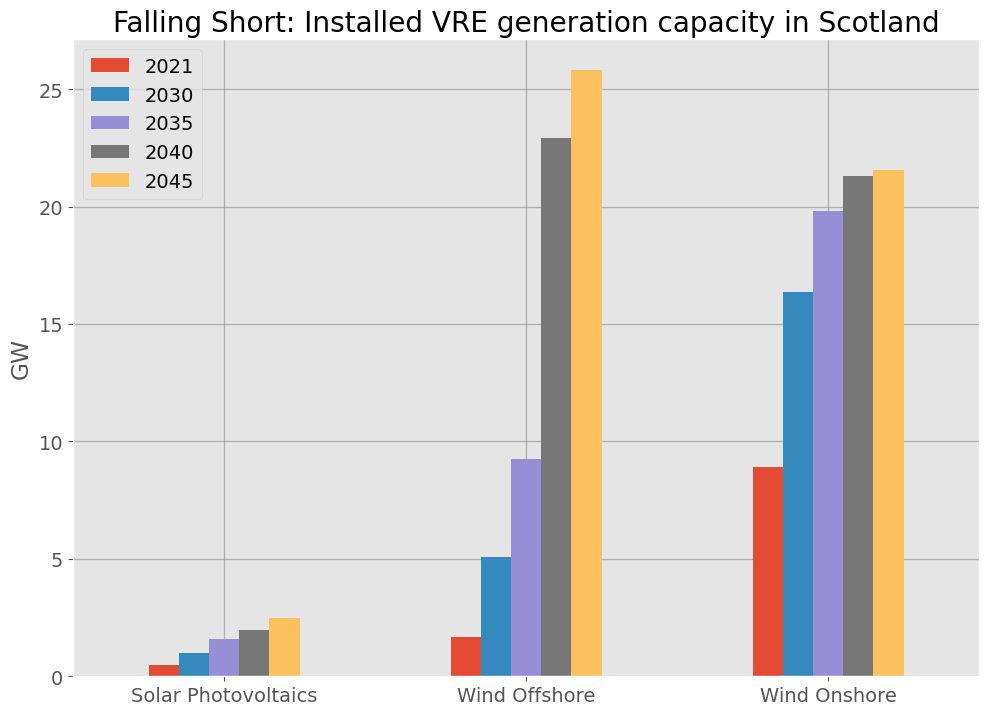

In [8]:
df = pd.concat([generators_p_nom_scotland_2021, generators_p_nom_scotland_2030, generators_p_nom_scotland_2035, generators_p_nom_scotland_2040, generators_p_nom_scotland_2045], axis=1) / 1000
df.loc['Large Hydro'] += df.loc['Small Hydro']
df.drop(['Small Hydro'], inplace=True)

df.columns = [2021, 2030, 2035, 2040, 2045]
df = df.reset_index().fillna(0)
df.iat[5, 0] = 'Hydro'

df_vres = df.iloc[[3, 6, 8]]
plt.rcParams.update({'font.size': 14})
df_vres.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Falling Short: Installed VRE generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

               carrier      2021       2030       2035       2040       2045
0                Waste  0.057536   0.102080   0.108112   0.106720   0.100224
1                  Oil  0.197340   0.089700   0.000000   0.000000   0.000000
2  Biomass (dedicated)  0.207607   0.270572   0.270572   0.270572   0.270572
3  Solar Photovoltaics  0.462292   1.006187   1.583852   1.970282   2.469212
4          Natural Gas  1.038400   0.000000   0.000000   1.180000   1.156400
5                Hydro  1.807805   1.824013   1.828702   1.832824   1.836503
6        Wind Offshore  1.663100   5.066100   9.256100  22.911100  25.831100
7              Nuclear  1.750000   0.000000   0.000000   0.000000   0.000000
8         Wind Onshore  8.928649  16.385369  19.807004  21.324359  21.561133
9              CCS Gas  0.000000   0.000000   0.988584   2.778584   3.678584


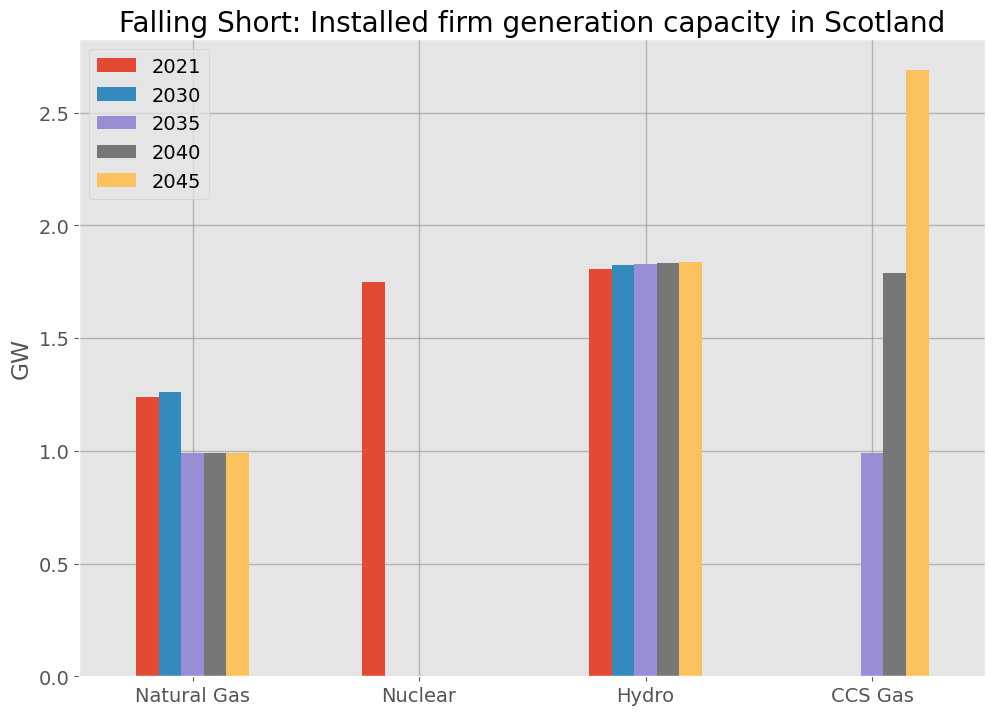

In [14]:
print(df)
# gas numbers are wrong
df.at[4, 2021] = 1.238
df.at[4, 2030] = 1.259
df.at[4, 2035] = 0.989
df.at[4, 2040] = 0.989
df.at[4, 2045] = 0.989
df.at[9, 2040] = 1.790
df.at[9, 2045] = 2.690
df_firm = df.iloc[[4, 7, 5, 9]]
df_firm.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Falling Short: Installed firm generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

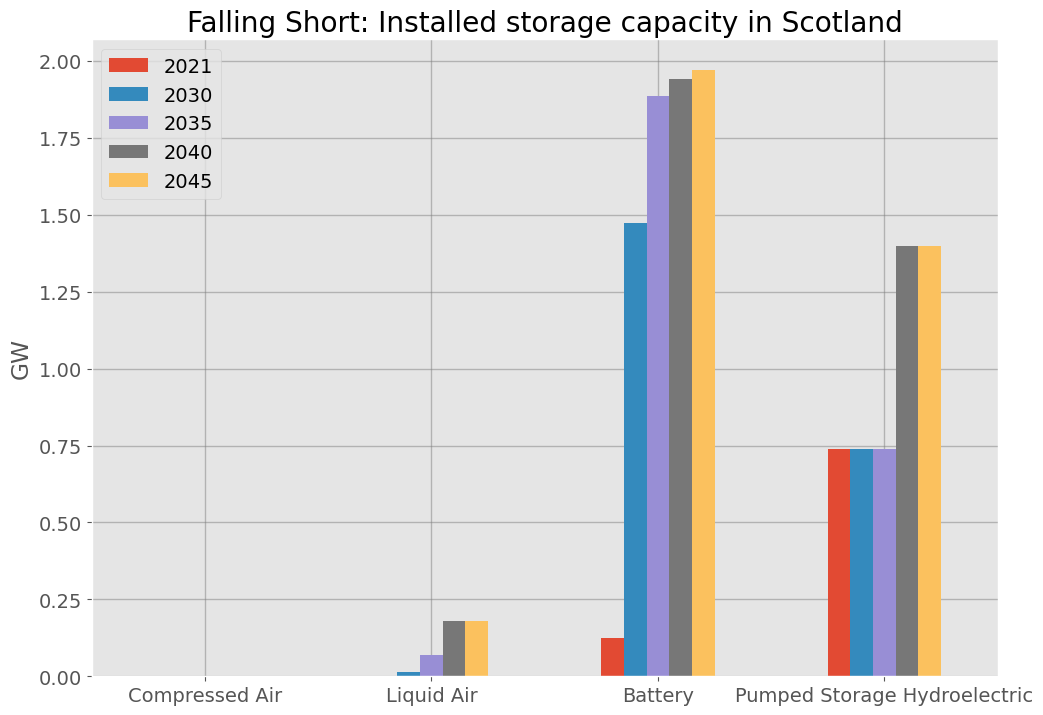

In [12]:
df_s = pd.concat([storage_p_nom_scotland_2021, storage_p_nom_scotland_2030, storage_p_nom_scotland_2035, storage_p_nom_scotland_2040, storage_p_nom_scotland_2045], axis=1) / 1000
df_s.columns = [2021, 2030, 2035, 2040, 2045]
df_s = df_s.reset_index().fillna(0)
df_s.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Falling Short: Installed storage capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

      Peak Demand
2021     4.619714
2030     5.344734
2035     6.393408
2040     7.844506
2045     9.178393


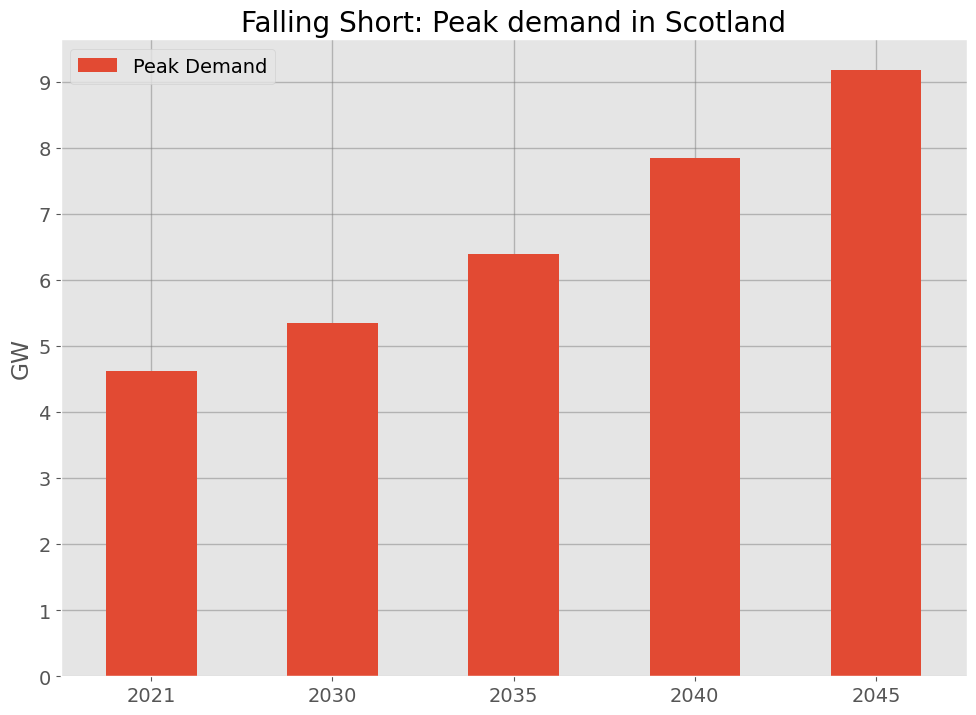

In [13]:
df_l = pd.DataFrame([peak_load_scotland_2021, peak_load_scotland_2030, peak_load_scotland_2035, peak_load_scotland_2040, peak_load_scotland_2045], columns=['Peak Demand']) / 1000
df_l.index = [2021, 2030, 2035, 2040, 2045]
# df_l = df_l.reset_index().fillna(0)
print(df_l)
df_l.plot(kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Falling Short: Peak demand in Scotland')
plt.ylabel('GW')
plt.yticks(np.arange(0, 10, 1.0))
# plt.xlabel('')
# plt.legend(loc='upper left')
# # plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# # plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)